# From Previous TA

中心为$\boldsymbol{0}$半径为R的n维球的定义为  
$$\sum_{i=1}^{n}{x_i^2}=R^2,n=1,2,3,\cdots$$
N维球的体积可以通过微积分计算  
例如一维“球”  
$$2\int_{0}^{R}{dx_1}$$
二维“球”  
$$4\int_{0}^{R}{dx_1\int_{0}^{\sqrt{R^2-x_1^2}}{dx_2}}$$
三维球
$$8\int_{0}^{R}{dx_1\int_{0}^{\sqrt{R^2-x_1^2}}{dx_2\int_{0}^{\sqrt{R^2-x_1^2-x_2^2}}{dx_3}}}$$
n维球
$$V_n(R)=2^n\int_{0}^{R}{dx_1\int_{0}^{\sqrt{R^2-x_1^2}}{dx_2\int_{0}^{\sqrt{R^2-x_1^2-x_2^2}}{dx_3\cdots\int_{0}^{\sqrt{R^2-\sum_{i=1}^{n-1}{x_i^2}}}dx_n}}}$$
直接计算这个积分十分困难，需要构造一个递推公式  
n维球的体积只与半径R有关，并且有与$R^n$相同的量纲，因此体积可以写成以下形式  
$$V_n(R)=C_nR^n$$
$C_n$是无量纲的常数，从n维球体积的公式中可以得到  
$$V_n(R)=2\int_{0}^{R}{V_{n-1}\left(\sqrt{R^2-x^2}\right)dx}$$
$$\frac{C_nR^n}{2C_{n-1}}=\int_{0}^{R}{\left(R^2-x^2\right)^{\frac{n-1}{2}}dx}$$
令$t=\left(R^2-x^2\right)/R^2$  
$$\frac{C_nR^n}{2C_{n-1}}=\frac{R^n}{2}\int_{0}^{1}{t^{\frac{n-1}{2}}(1-t)^{-\frac{1}{2}}dt}$$
$$\frac{C_n}{C_{n-1}}=B\left(\frac{n+1}{2},\frac{1}{2}\right)=\frac{\Gamma\left(\frac{n+1}{2}\right)\Gamma\left(\frac{1}{2}\right)}{\Gamma\left(\frac{n+2}{2}\right)}$$
递推得到$C_n/C_1$  
$$\frac{C_n}{C_{1}}=\frac{\pi^{n/2}}{n\Gamma(n/2)}$$
$C_1=2$  
$$C_n=\frac{\pi^{n/2}}{\Gamma(n/2+1)}$$
$$V_n(R)=\frac{\pi^{n/2}}{\Gamma(n/2+1)}R^n$$

高维积分的求解一般是十分困难的，即使是看起来简单的球形，解析求解也十分困难，使用蒙特卡罗方法计算则会简单很多。  
半径为1的n维球的体积可以用积分式写成符合蒙特卡罗方法要求的形式  
$$I=2^n\int_{0}^{1}{dx_1\int_{0}^{1}{dx_2\cdots\int_{0}^{1}{dx_nf(x_1,x_2,\cdots,x_n)}}}$$
其中  
$$f(x_1,x_2,\cdots,x_n)=
\left\{
    {
    \begin{array}{cc}
        1 ,& \sum_{i=1}^{n}{x_i^2}\leq1 \\
        0 ,& \sum_{i=1}^{n}{x_i^2}>1 \\
    \end{array}
    }
\right.
$$
这样就可以用平均值法计算这个积分的估计值，具体过程如下：  
产生一组$[0,1]$上均匀分布的随机数$\boldsymbol{\xi}=(\xi_1,\xi_2,\cdots,\xi_n)$，并计算函数值$f(\boldsymbol{\xi})$，重复多次，以函数值的期望值作为积分的估计值  
下面计算半径为1的5维球的体积  
首先计算理论值  

In [1]:
import numpy as np
from numpy.random import default_rng
from scipy.special import gamma

rng = default_rng()

In [2]:
# 计算n维球体积的函数
def V_sphere(R=1, dim=3):
    return (np.pi)**(dim/2)/gamma(dim/2+1)*R**dim

# 5维球的体积
print(V_sphere(1, 5))

5.263789013914324


平均值法  

In [3]:
dim = 5
N = 10**6

xi_array = rng.random((N, dim))

n = 0

for xi_vec in xi_array:
    if np.linalg.norm(xi_vec) <= 1:
        n += 1

print(n/N*2**dim)

5.262816


这个积分也可以用投点法估算，过程如下：  
产生一组$\boldsymbol{\xi}=(\xi_1,\xi_2,\cdots,\xi_n)$，并计算函数值$f(\boldsymbol{\xi})$，再产生一个$\xi_{n+1}$，比较$f(\boldsymbol{\xi})$和$\xi_{n+1}$的大小  
重复多次，取$f(\boldsymbol{\xi})\geq\xi_{n+1}$的点数和总点数的比值为积分的估计值  
由于函数值$f(\boldsymbol{\xi})$只能是0或1，$f(\boldsymbol{\xi})\geq\xi_{n+1}$是否成立与$\xi_{n+1}$的大小无关  
所以可以不用产生$\xi_{n+1}$，从而实际操作和平均值法完全相同。

# Volume of Sphere

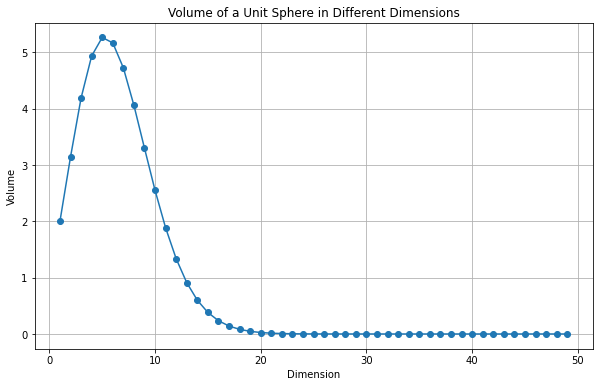

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Define the function to calculate the volume of a d-dimensional sphere
def sphere_volume(d, r=1):
    return (np.pi**(d/2) * r**d) / gamma(d/2 + 1)

# Generate a range of dimensions
dimensions = np.arange(1, 50, 1)  # from 1 to 49
volumes = [sphere_volume(d) for d in dimensions]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(dimensions, volumes, marker='o')
plt.title('Volume of a Unit Sphere in Different Dimensions')
plt.xlabel('Dimension')
plt.ylabel('Volume')
plt.grid()
plt.show()

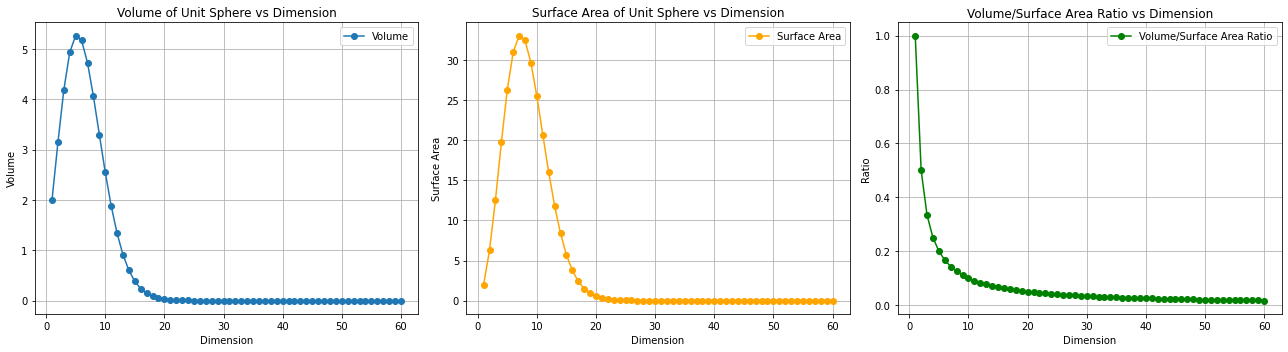

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# 计算 n 维单位球的体积
def sphere_volume(n):
    return np.pi**(n/2) / gamma(n/2 + 1)

# 计算 n 维单位球的表面积
def sphere_surface_area(n):
    return 2 * np.pi**(n/2) / gamma(n/2)

# 计算不同维度下的体积、表面积和比值
dimensions = np.arange(1, 61)
volumes = np.array([sphere_volume(n) for n in dimensions])
areas = np.array([sphere_surface_area(n) for n in dimensions])
ratios = volumes / areas  # 体积与表面积的比值

# 创建图表
plt.figure(figsize=(18, 5))

# 绘制体积随维度变化
plt.subplot(1, 3, 1)
plt.plot(dimensions, volumes, marker='o', label='Volume')
plt.title('Volume of Unit Sphere vs Dimension')
plt.xlabel('Dimension')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()

# 绘制表面积随维度变化
plt.subplot(1, 3, 2)
plt.plot(dimensions, areas, marker='o', color='orange', label='Surface Area')
plt.title('Surface Area of Unit Sphere vs Dimension')
plt.xlabel('Dimension')
plt.ylabel('Surface Area')
plt.grid(True)
plt.legend()

# 绘制体积与表面积的比值随维度变化
plt.subplot(1, 3, 3)
plt.plot(dimensions, ratios, marker='o', color='green', label='Volume/Surface Area Ratio')
plt.title('Volume/Surface Area Ratio vs Dimension')
plt.xlabel('Dimension')
plt.ylabel('Ratio')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In theory, ratio = $\frac{1}{n}$

# Angle Between Random Vectors

## Normal Dist

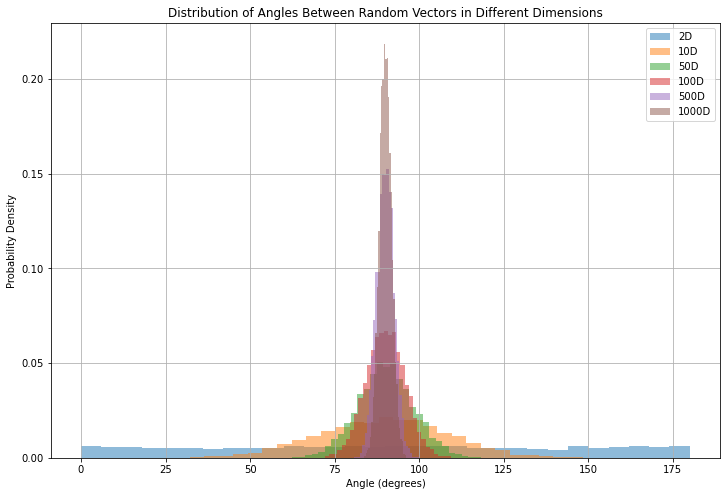

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random vectors and compute angles between them
def generate_angles(num_vectors, dimensions):
    # Generate random vectors in the given dimension
    vectors = np.random.randn(num_vectors, dimensions) # randm and rand show similar results
    # Normalize each vector
    vectors = vectors / np.linalg.norm(vectors, axis=1, keepdims=True)
    # Compute pairwise angles
    angles = []
    for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            # Calculate the dot product
            dot_product = np.dot(vectors[i], vectors[j])
            # Compute the angle in degrees
            angle = np.arccos(np.clip(dot_product, -1.0, 1.0)) * 180 / np.pi
            angles.append(angle)
    return angles

# Parameters
num_vectors = 100  # Number of vectors to generate
dimensions_list = [2, 10, 50, 100, 500, 1000]  # List of dimensions to try

# Plotting the distribution of angles for different dimensions
plt.figure(figsize=(12, 8))
for dimensions in dimensions_list:
    angles = generate_angles(num_vectors, dimensions)
    # Plot histogram of angles
    plt.hist(angles, bins=30, alpha=0.5, label=f'{dimensions}D', density=True)

plt.title('Distribution of Angles Between Random Vectors in Different Dimensions')
plt.xlabel('Angle (degrees)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

## Uniform Dist

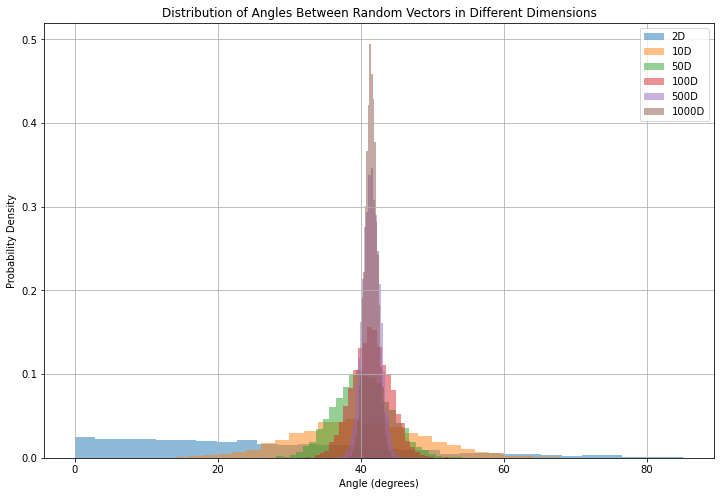

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random vectors and compute angles between them
def generate_angles(num_vectors, dimensions):
    # Generate random vectors in the given dimension
    vectors = np.random.rand(num_vectors, dimensions) # randm and rand show similar results
    # Normalize each vector
    vectors = vectors / np.linalg.norm(vectors, axis=1, keepdims=True)
    # Compute pairwise angles
    angles = []
    for i in range(num_vectors):
        for j in range(i + 1, num_vectors):
            # Calculate the dot product
            dot_product = np.dot(vectors[i], vectors[j])
            # Compute the angle in degrees
            angle = np.arccos(np.clip(dot_product, -1.0, 1.0)) * 180 / np.pi
            angles.append(angle)
    return angles

# Parameters
num_vectors = 100  # Number of vectors to generate
dimensions_list = [2, 10, 50, 100, 500, 1000]  # List of dimensions to try

# Plotting the distribution of angles for different dimensions
plt.figure(figsize=(12, 8))
for dimensions in dimensions_list:
    angles = generate_angles(num_vectors, dimensions)
    # Plot histogram of angles
    plt.hist(angles, bins=30, alpha=0.5, label=f'{dimensions}D', density=True)

plt.title('Distribution of Angles Between Random Vectors in Different Dimensions')
plt.xlabel('Angle (degrees)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

# Distance Between Random Points

## Normal Dist

Processing dimension: 2
Processing dimension: 5
Processing dimension: 10
Processing dimension: 50
Processing dimension: 100
Processing dimension: 500
Processing dimension: 1000


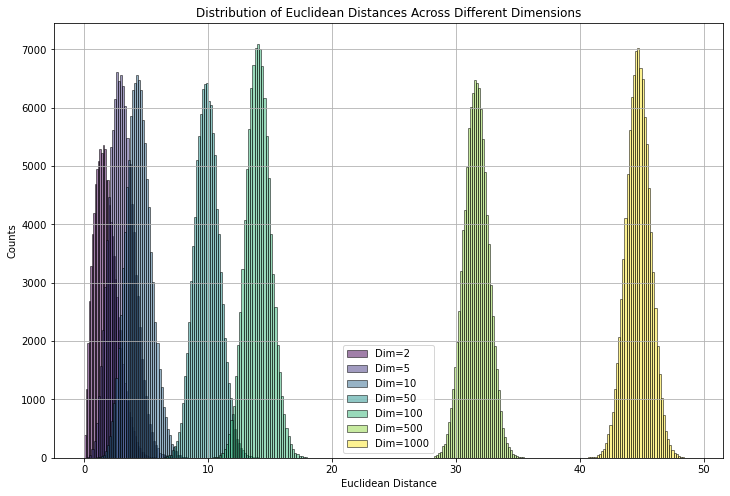

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import itertools

def compare_dimensions(dimensions=[1, 10, 100, 1000], 
                      num_points=1000, 
                      num_samples=100000, 
                      num_bins=50):
    """
    Compares the distribution of Euclidean distances across different dimensions.
    
    Parameters:
    - dimensions: List of dimensions to compare.
    - num_points: Number of random points to generate for each dimension.
    - num_samples: Number of pairwise distances to sample for each dimension.
    - num_bins: Number of bins for the histogram.
    """
    plt.figure(figsize=(12, 8))
    
    # Define a color palette
    colors = plt.cm.viridis(np.linspace(0, 1, len(dimensions)))
    
    for idx, dim in enumerate(dimensions):
        print(f"Processing dimension: {dim}")
        
        # Step 1: Generate random points
        points = np.random.randn(num_points, dim)
        
        # Step 2: Sample pairwise distances
        # To efficiently sample, randomly choose pairs
        idx1 = np.random.randint(0, num_points, size=num_samples)
        idx2 = np.random.randint(0, num_points, size=num_samples)
        
        # Ensure that we don't choose the same point
        mask = idx1 != idx2
        idx1 = idx1[mask]
        idx2 = idx2[mask]
        
        # Adjust number of samples if necessary
        if len(idx1) > num_samples:
            idx1 = idx1[:num_samples]
            idx2 = idx2[:num_samples]
        
        # Calculate Euclidean distances
        sampled_distances = np.linalg.norm(points[idx1] - points[idx2], axis=1)
        
        # Step 3: Plot histogram
        plt.hist(sampled_distances, bins=num_bins, 
                 color=colors[idx], alpha=0.5, label=f'Dim={dim}', 
                 edgecolor='black')
    
    plt.title('Distribution of Euclidean Distances Across Different Dimensions')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Counts')  # Changed from 'Frequency' to 'Counts'
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Parameters
    DIMENSIONS_TO_COMPARE = [2, 5, 10, 50, 100, 500, 1000]  # You can modify this list
    NUM_POINTS = 1000       # Number of points per dimension
    NUM_SAMPLES = 100000    # Number of distance samples per dimension
    NUM_BINS = 50           # Number of bins in the histogram
    
    compare_dimensions(dimensions=DIMENSIONS_TO_COMPARE, 
                      num_points=NUM_POINTS, 
                      num_samples=NUM_SAMPLES, 
                      num_bins=NUM_BINS)


## Uniform Dist

Processing dimension: 2
Processing dimension: 5
Processing dimension: 10
Processing dimension: 50
Processing dimension: 100
Processing dimension: 500
Processing dimension: 1000


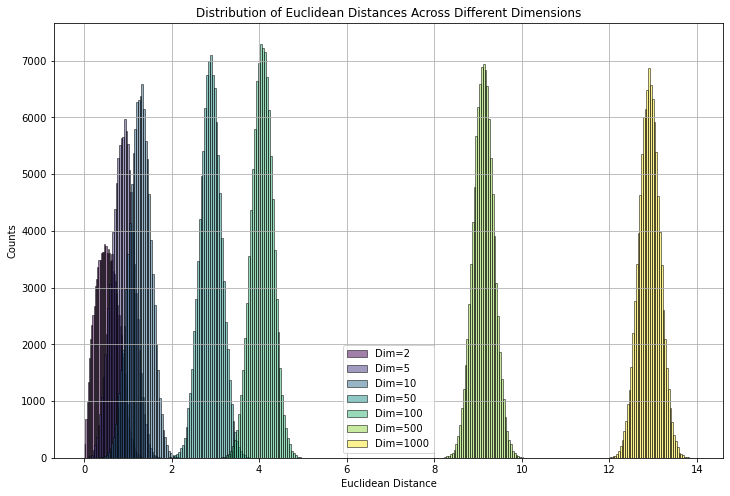

In [ ]:
def compare_dimensions(dimensions=[1, 10, 100, 1000], 
                      num_points=1000, 
                      num_samples=100000, 
                      num_bins=50):
    """
    Compares the distribution of Euclidean distances across different dimensions.
    
    Parameters:
    - dimensions: List of dimensions to compare.
    - num_points: Number of random points to generate for each dimension.
    - num_samples: Number of pairwise distances to sample for each dimension.
    - num_bins: Number of bins for the histogram.
    """
    plt.figure(figsize=(12, 8))
    
    # Define a color palette
    colors = plt.cm.viridis(np.linspace(0, 1, len(dimensions)))
    
    for idx, dim in enumerate(dimensions):
        print(f"Processing dimension: {dim}")
        
        # Step 1: Generate random points
        points = np.random.rand(num_points, dim)
        
        # Step 2: Sample pairwise distances
        # To efficiently sample, randomly choose pairs
        idx1 = np.random.randint(0, num_points, size=num_samples)
        idx2 = np.random.randint(0, num_points, size=num_samples)
        
        # Ensure that we don't choose the same point
        mask = idx1 != idx2
        idx1 = idx1[mask]
        idx2 = idx2[mask]
        
        # Adjust number of samples if necessary
        if len(idx1) > num_samples:
            idx1 = idx1[:num_samples]
            idx2 = idx2[:num_samples]
        
        # Calculate Euclidean distances
        sampled_distances = np.linalg.norm(points[idx1] - points[idx2], axis=1)
        
        # Step 3: Plot histogram
        plt.hist(sampled_distances, bins=num_bins, 
                 color=colors[idx], alpha=0.5, label=f'Dim={dim}', 
                 edgecolor='black')
    
    plt.title('Distribution of Euclidean Distances Across Different Dimensions')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Counts')  # Changed from 'Frequency' to 'Counts'
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    # Parameters
    DIMENSIONS_TO_COMPARE = [2, 5, 10, 50, 100, 500, 1000]  # You can modify this list
    NUM_POINTS = 1000       # Number of points per dimension
    NUM_SAMPLES = 100000    # Number of distance samples per dimension
    NUM_BINS = 50           # Number of bins in the histogram
    
    compare_dimensions(dimensions=DIMENSIONS_TO_COMPARE, 
                      num_points=NUM_POINTS, 
                      num_samples=NUM_SAMPLES, 
                      num_bins=NUM_BINS)
